# LangGraph Agent
## Without tools

## Library Imports

In [6]:
from langchain_core.messages import HumanMessage
from langchain_anthropic import ChatAnthropic
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
import logging
from IPython.display import Image, Markdown, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

## Configure logging

In [8]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='langgraph_notebook.log',
    level=logging.INFO
)

## Configure Agent and Model

In [10]:
model = ChatAnthropic(model="claude-3-5-sonnet-20240620", temperature=0)

def call_model(state: MessagesState):
    messages = state['messages']
    response = model.invoke(messages)
    return {"messages": [response]}

workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)

workflow.add_edge(START, "agent")

checkpointer = MemorySaver()

app = workflow.compile(checkpointer=checkpointer)

## Visualize de Graph

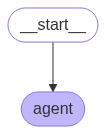

In [11]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)